In [2]:
import pandas as pd
import matplotlib.pyplot as plt


Csv dosyasındaki 6382. satırdaki brüt ve net m^2 degerlerinin ikiside 120104 tü brüt = 120 net = 104 olarak değiştirdim.

 1.Import the data as a dataframe. 

In [3]:
# import the dataframe
df = pd.read_csv(r"C:\Users\yasir\Desktop\datahomes.csv")

 2.	Prices of some houses are missing. Find them and replace them with the average prices of the districts they belong to. For example if the house is from Şişli, then assign the average price of the houses in Şişli.

In [4]:
# Calculate the mean price for each district and fill missing values in the 'Price' column with the corresponding district mean
fill_values = df.groupby(['District'])['Price'].transform("mean").astype(int)

# Fill missing values in the 'Price' column with the calculated district means
df['Price'].fillna(fill_values, inplace = True)

df.isnull().sum()

Order                       0
Brüt m²                     0
Net m²                     79
Rooms                       0
Bath                        0
Floors                    295
Floor Location            251
Building Age              262
Heating Type              298
Furniture                 684
Using Status              350
Building Status          2608
Housing Type             1386
Rent Earning             1767
From                     2765
Suitable for Credit         0
Price                       0
Coord1                     55
Coord2                     55
Street                      0
District                    0
Location3                   0
Due Price                2278
Suitable for exchange    5279
dtype: int64

 3.	There is some other missing data as well in the given dataset. Fill in the missing values using the following rules:
    
    a.	If it’s a continuous number like the size of the house, then put the median of the given dataset. 
   
   b.	If it’s a categorical variable like Heating type, assign the most frequent value. 


In [5]:
# Assuming df is your DataFrame

for column in df.columns:
    if df[column].dtype == 'object':
        # Fill missing values for categorical columns with the most frequent value
        df[column] = df[column].fillna(df[column].mode().iloc[0])
    else:
        # Fill missing values for numerical columns with the median
        df[column] = df[column].fillna(df[column].median())

df.isnull().sum()
df

,Order,Brüt m²,Net m²,Rooms,Bath,Floors,Floor Location,Building Age,Heating Type,Furniture,...,From,Suitable for Credit,Price,Coord1,Coord2,Street,District,Location3,Due Price,Suitable for exchange
0,1,122,121.0,3+1,2,10-20 arası,7,0,Güneş Enerjisi,Eşyasız,...,Danışman,Evet,610000.0,41.132680,28.832360,Eski Habipler,Sultangazi,İstanbul,0.0,Evet
1,2,127,100.0,2+1,2,20 ve üzeri,10,0,Klima,Eşyasız,...,Danışman,Hayır,775000.0,41.124202,28.770181,Kayabaşı,Başakşehir,İstanbul,0.0,Evet
2,3,130,129.0,2+1,2,5,1,6-10 arası,Klima,Sadece Beyaz Eşya,...,Danışman,Evet,630000.0,41.039231,28.764351,Atakent,Küçükçekmece,İstanbul,0.0,Evet
3,4,125,95.0,3+1,2,10,9,0,Kombi (Doğalgaz),Eşyasız,...,Danışman,Evet,665000.0,40.982150,29.084179,Sahrayı Cedit,Kadıköy,İstanbul,0.0,Evet
4,5,120,115.0,3+1,1,5,Giriş Katı,0,Kombi (Doğalgaz),Eşyasız,...,Danışman,Evet,142000.0,40.999608,28.662905,Beylikdüzü OSB,Beylikdüzü,İstanbul,0.0,Evet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,7040,80,79.0,2+1,2,5,5,0,Kombi (Doğalgaz),Eşyasız,...,Danışman,Evet,400000.0,40.890977,29.194842,Çavuşoğlu,Kartal,İstanbul,0.0,Evet
7038,7041,90,85.0,2+1,1,3,3,21-25 arası,Kombi (Doğalgaz),Eşyasız,...,Danışman,Evet,260000.0,40.985483,28.699392,Cihangir,Avcılar,İstanbul,0.0,Evet
7039,7042,280,279.0,6+1,3,4,2,11-15 arası,Kombi (Doğalgaz),Sadece Beyaz Eşya,...,Danışman,Evet,5400000.0,41.178008,28.890181,Göktürk Merkez,Eyüpsultan,İstanbul,0.0,Evet
7040,7043,100,90.0,2+1,1,4,1,0,Kombi (Doğalgaz),Eşyasız,...,Danışman,Evet,320000.0,41.181991,28.732976,Arnavutköy Merkez,Arnavutköy,İstanbul,0.0,Evet


 4.	There are some repetitive rows, i.e. the same houses are given in different lines. If everything except the price is the same, then they belong to the same house which means these rows are repetitive. Find and clear them by erasing the data which has the larger price since it means that the house is not sold and the owner has reduced the price in a new ad to sell the house. 

In [6]:
# check the rows with the same features except of 'Price'. Excluded 'Order' columnn too because they are indexes.
df = df.sort_values('Price').drop_duplicates(subset=df.columns.difference(['Price', 'Order']), keep= 'first').reset_index(drop=True)
df

,Order,Brüt m²,Net m²,Rooms,Bath,Floors,Floor Location,Building Age,Heating Type,Furniture,...,From,Suitable for Credit,Price,Coord1,Coord2,Street,District,Location3,Due Price,Suitable for exchange
0,5596,55,45.0,1+0 (Stüdyo),1,6,Bahçe katı,16-20 arası,Klima,Eşyasız,...,Danışman,Hayır,45000.0,41.057993,28.804805,Mehmet Akif,Küçükçekmece,İstanbul,0.0,Evet
1,1635,85,49.0,1+0 (Stüdyo),1,20 ve üzeri,5,0,Merkezi Sistem (Isı Payı Ölçer),Eşyasız,...,Danışman,Evet,48000.0,41.067080,28.671649,Bahçeşehir 2. Kısım,Başakşehir,İstanbul,0.0,Evet
2,323,95,90.0,2+1,1,6,3,0,Kalorifer (Doğalgaz),Eşyasız,...,Danışman,Evet,50000.0,41.056458,28.853778,100. Yıl,Bağcılar,İstanbul,0.0,Evet
3,3119,45,40.0,1+0 (Stüdyo),1,7,Bahçe katı,16-20 arası,Klima,Sadece Beyaz Eşya,...,Danışman,Hayır,59999.0,41.058116,28.808933,Mehmet Akif,Küçükçekmece,İstanbul,0.0,Evet
4,5708,150,100.0,2+1,2,10-20 arası,16,0,Merkezi Sistem (Isı Payı Ölçer),Eşyasız,...,Danışman,Hayır,60000.0,41.077548,28.765883,Ziya Gökalp,Başakşehir,İstanbul,380.0,Evet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7013,6752,340,300.0,4+1,2,2,1,26-30 arası,Kombi (Doğalgaz),Sadece Beyaz Eşya,...,Danışman,Evet,19950000.0,41.064910,29.032272,Kuruçeşme,Beşiktaş,İstanbul,0.0,Evet
7014,5954,370,369.0,5+1,3,4,4,0,Kombi (Doğalgaz),Sadece Beyaz Eşya,...,Danışman,Evet,21000000.0,41.058547,29.024173,Ortaköy,Beşiktaş,İstanbul,0.0,Evet
7015,399,350,300.0,4+1,1,3,3,40 ve üzeri,Kombi (Doğalgaz),Sadece Beyaz Eşya,...,Danışman,Evet,23500000.0,41.084442,29.036057,Etiler,Beşiktaş,İstanbul,0.0,Evet
7016,4389,300,299.0,4+1,3,3,3,16-20 arası,Kombi (Doğalgaz),Eşyasız,...,Danışman,Evet,27000000.0,41.062916,29.030632,Ulus,Beşiktaş,İstanbul,0.0,Evet


5.	Find the average price of houses for each district (district) and create a new dataframe that only has the districts with these average prices. You will use this dataframe in the following questions as well. 

In [7]:
district_dataframe = df.groupby(['District'])['Price'].mean().astype(int)
district_dataframe = pd.DataFrame(district_dataframe).reset_index()
district_dataframe

,District,Price
0,Adalar,952500
1,Arnavutköy,294999
2,Ataşehir,429948
3,Avcılar,296354
4,Bahçelievler,490842
5,Bakırköy,2255520
6,Bayrampaşa,446270
7,Bağcılar,399780
8,Başakşehir,622201
9,Beykoz,948644


6.	Find the standard deviation of the prices of each district. You can find the definition of the standard deviation from wikipedia or use the following formula where Xbar is the average of the data. Add the standard deviation of each district to the district dataframe. 

In [8]:

grouped_df = df.groupby('District')

def calc_std(group):
    
    prices = group['Price']
    
    mean = prices.mean()
  
    sum_squared_diff = sum((prices - mean) ** 2)
  
    variance = sum_squared_diff / (len(prices) -1 )
  
    std = variance ** 0.5
  
    return std


std_by_district = grouped_df.apply(calc_std).reset_index()

district_dataframe['Standard Deviation of the Prices'] = std_by_district[0]
district_dataframe


,District,Price,Standard Deviation of the Prices
0,Adalar,952500,7.532845e+05
1,Arnavutköy,294999,1.196458e+05
2,Ataşehir,429948,2.764791e+05
3,Avcılar,296354,1.687022e+05
4,Bahçelievler,490842,3.770974e+05
5,Bakırköy,2255520,2.459135e+06
6,Bayrampaşa,446270,2.132012e+05
7,Bağcılar,399780,1.929382e+05
8,Başakşehir,622201,4.018606e+05
9,Beykoz,948644,8.050203e+05


8.	Find the number of houses whose price is less than 250K TL, between 250K(exclusive) and 500k (inclusive)  and larger than 500k(exclusive). 

In [9]:

# Defined a dictionary for counting cars in different price ranges
counts = {
    
# Select rows where the 'Price' column is less than 100000 and count the number of rows   
'0-250' : df[df['Price'] <= 250000]['Price'].count(),
    
# Select rows where the 'Price' column is greater than 100000 and less than 200000 and count the number of rows
'250-500' :df[(500000 >= df['Price']) & (df['Price'] > 250000) ]['Price'].count(),
    
# Select rows where the 'Price' column is greater than 200000 and count the number of rows    
'500 and over' : df[df['Price'] > 500000]['Price'].count()
}

# Print the counts of cars in different price ranges
print(counts)

{'0-250': 1937, '250-500': 3082, '500 and over': 1999}


10.	Find the average price with respect to “room count” and return it as a dictionary like above

In [10]:
# Grouping by 'room count' and taking the average of the prices.
average_price_room = df.groupby(['Rooms'])['Price'].mean().to_dict()

print(average_price_room)

{'1+0 (Stüdyo)': 147533.26666666666, '1+1': 299896.28435114503, '10 ve üzeri': 5262142.857142857, '2': 290000.0, '2+1': 341608.7331325301, '2+2': 475758.6206896552, '3': 4275000.0, '3+1': 642423.5939597315, '3+2': 652196.5317919075, '4+1': 1549480.617312073, '4+2': 941740.9045454545, '4+3': 565000.0, '5+1': 2898810.975609756, '5+2': 1154825.3333333333, '5+3': 16940000.0, '6+1': 4312272.7272727275, '6+2': 2253952.3333333335, '7+1': 700000.0, '7+2': 3475000.0, '8+4': 2790000.0, '9+1': 1100000.0}


11.	Find the average price of 3+1 houses in each district and return it as a dictionary like above. 

In [11]:
# Selecting the houses with the '3+1' room count in each district and taking the average prices.
average_price = df[df['Rooms'] == '3+1'].groupby('District')['Price'].mean().to_dict()
print(average_price)

{'Adalar': 1270000.0, 'Arnavutköy': 349900.0, 'Ataşehir': 560270.2702702703, 'Avcılar': 353928.45544554456, 'Bahçelievler': 542854.4051724138, 'Bakırköy': 1994192.3076923077, 'Bayrampaşa': 456750.0, 'Bağcılar': 488048.7804878049, 'Başakşehir': 605519.8424657534, 'Beykoz': 921700.0, 'Beylikdüzü': 376112.7320261438, 'Beyoğlu': 1660714.2857142857, 'Beşiktaş': 2554000.0, 'Büyükçekmece': 534689.6551724138, 'Esenler': 407368.4210526316, 'Esenyurt': 340019.801980198, 'Eyüpsultan': 602166.6666666666, 'Fatih': 660555.5555555555, 'Gaziosmanpaşa': 457200.0, 'Güngören': 526107.1428571428, 'Kadıköy': 1199583.6776859504, 'Kartal': 470347.5232558139, 'Kağıthane': 481250.0, 'Küçükçekmece': 556313.432835821, 'Maltepe': 549736.8421052631, 'Pendik': 380030.6818181818, 'Sancaktepe': 296130.63063063065, 'Sarıyer': 1652727.2727272727, 'Silivri': 365808.5106382979, 'Sultanbeyli': 324368.4210526316, 'Sultangazi': 366000.0, 'Tuzla': 410678.5714285714, 'Zeytinburnu': 545958.3333333334, 'Çatalca': 289400.0, 'Çek

12.	Print the house dataframe which is ordered in terms of the prices of the houses. 

In [12]:
# Sorting dataframe by 'Price'
df.sort_values('Price')

,Order,Brüt m²,Net m²,Rooms,Bath,Floors,Floor Location,Building Age,Heating Type,Furniture,...,From,Suitable for Credit,Price,Coord1,Coord2,Street,District,Location3,Due Price,Suitable for exchange
0,5596,55,45.0,1+0 (Stüdyo),1,6,Bahçe katı,16-20 arası,Klima,Eşyasız,...,Danışman,Hayır,45000.0,41.057993,28.804805,Mehmet Akif,Küçükçekmece,İstanbul,0.0,Evet
1,1635,85,49.0,1+0 (Stüdyo),1,20 ve üzeri,5,0,Merkezi Sistem (Isı Payı Ölçer),Eşyasız,...,Danışman,Evet,48000.0,41.067080,28.671649,Bahçeşehir 2. Kısım,Başakşehir,İstanbul,0.0,Evet
2,323,95,90.0,2+1,1,6,3,0,Kalorifer (Doğalgaz),Eşyasız,...,Danışman,Evet,50000.0,41.056458,28.853778,100. Yıl,Bağcılar,İstanbul,0.0,Evet
3,3119,45,40.0,1+0 (Stüdyo),1,7,Bahçe katı,16-20 arası,Klima,Sadece Beyaz Eşya,...,Danışman,Hayır,59999.0,41.058116,28.808933,Mehmet Akif,Küçükçekmece,İstanbul,0.0,Evet
4,5708,150,100.0,2+1,2,10-20 arası,16,0,Merkezi Sistem (Isı Payı Ölçer),Eşyasız,...,Danışman,Hayır,60000.0,41.077548,28.765883,Ziya Gökalp,Başakşehir,İstanbul,380.0,Evet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7013,6752,340,300.0,4+1,2,2,1,26-30 arası,Kombi (Doğalgaz),Sadece Beyaz Eşya,...,Danışman,Evet,19950000.0,41.064910,29.032272,Kuruçeşme,Beşiktaş,İstanbul,0.0,Evet
7014,5954,370,369.0,5+1,3,4,4,0,Kombi (Doğalgaz),Sadece Beyaz Eşya,...,Danışman,Evet,21000000.0,41.058547,29.024173,Ortaköy,Beşiktaş,İstanbul,0.0,Evet
7015,399,350,300.0,4+1,1,3,3,40 ve üzeri,Kombi (Doğalgaz),Sadece Beyaz Eşya,...,Danışman,Evet,23500000.0,41.084442,29.036057,Etiler,Beşiktaş,İstanbul,0.0,Evet
7016,4389,300,299.0,4+1,3,3,3,16-20 arası,Kombi (Doğalgaz),Eşyasız,...,Danışman,Evet,27000000.0,41.062916,29.030632,Ulus,Beşiktaş,İstanbul,0.0,Evet


13.	Print the dataframe which is ordered in terms of first district and then street lexicographically. 

In [13]:
# Sorting dataframe first by 'Price' and second 'Street'
df.sort_values(by=['Price', 'Street'])

,Order,Brüt m²,Net m²,Rooms,Bath,Floors,Floor Location,Building Age,Heating Type,Furniture,...,From,Suitable for Credit,Price,Coord1,Coord2,Street,District,Location3,Due Price,Suitable for exchange
0,5596,55,45.0,1+0 (Stüdyo),1,6,Bahçe katı,16-20 arası,Klima,Eşyasız,...,Danışman,Hayır,45000.0,41.057993,28.804805,Mehmet Akif,Küçükçekmece,İstanbul,0.0,Evet
1,1635,85,49.0,1+0 (Stüdyo),1,20 ve üzeri,5,0,Merkezi Sistem (Isı Payı Ölçer),Eşyasız,...,Danışman,Evet,48000.0,41.067080,28.671649,Bahçeşehir 2. Kısım,Başakşehir,İstanbul,0.0,Evet
2,323,95,90.0,2+1,1,6,3,0,Kalorifer (Doğalgaz),Eşyasız,...,Danışman,Evet,50000.0,41.056458,28.853778,100. Yıl,Bağcılar,İstanbul,0.0,Evet
3,3119,45,40.0,1+0 (Stüdyo),1,7,Bahçe katı,16-20 arası,Klima,Sadece Beyaz Eşya,...,Danışman,Hayır,59999.0,41.058116,28.808933,Mehmet Akif,Küçükçekmece,İstanbul,0.0,Evet
4,5708,150,100.0,2+1,2,10-20 arası,16,0,Merkezi Sistem (Isı Payı Ölçer),Eşyasız,...,Danışman,Hayır,60000.0,41.077548,28.765883,Ziya Gökalp,Başakşehir,İstanbul,380.0,Evet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7013,6752,340,300.0,4+1,2,2,1,26-30 arası,Kombi (Doğalgaz),Sadece Beyaz Eşya,...,Danışman,Evet,19950000.0,41.064910,29.032272,Kuruçeşme,Beşiktaş,İstanbul,0.0,Evet
7014,5954,370,369.0,5+1,3,4,4,0,Kombi (Doğalgaz),Sadece Beyaz Eşya,...,Danışman,Evet,21000000.0,41.058547,29.024173,Ortaköy,Beşiktaş,İstanbul,0.0,Evet
7015,399,350,300.0,4+1,1,3,3,40 ve üzeri,Kombi (Doğalgaz),Sadece Beyaz Eşya,...,Danışman,Evet,23500000.0,41.084442,29.036057,Etiler,Beşiktaş,İstanbul,0.0,Evet
7016,4389,300,299.0,4+1,3,3,3,16-20 arası,Kombi (Doğalgaz),Eşyasız,...,Danışman,Evet,27000000.0,41.062916,29.030632,Ulus,Beşiktaş,İstanbul,0.0,Evet


14.	Make a scatter plot of size of the houses (X axis) and the price of the houses (Y axis.)

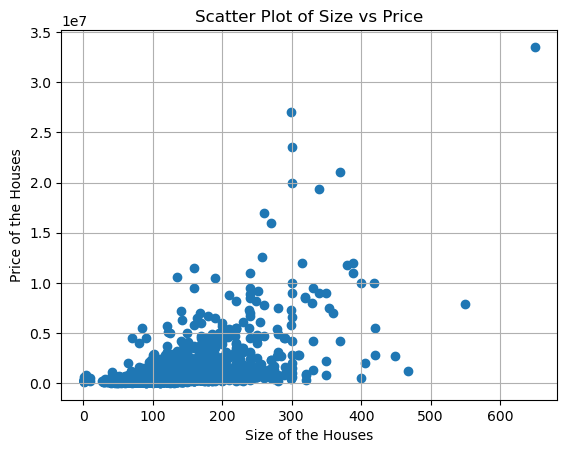

In [14]:
# Create a scatter plot which shows the relationship between 'Net m²' and 'Price'
plt.scatter(df['Net m²'], df['Price'], cmap='viridis')

# Set labels and title
plt.xlabel('Size of the Houses')
plt.ylabel('Price of the Houses')
plt.title('Scatter Plot of Size vs Price')
# Add grid lines
plt.grid(True)

# Show the plot
plt.show()

15.	Divide the price of the houses by its net m2 size and add it as a new column to the house datafame. 

In [15]:
df['Price Per Net m^2'] = df['Price'] / df['Net m²']

df

,Order,Brüt m²,Net m²,Rooms,Bath,Floors,Floor Location,Building Age,Heating Type,Furniture,...,Suitable for Credit,Price,Coord1,Coord2,Street,District,Location3,Due Price,Suitable for exchange,Price Per Net m^2
0,5596,55,45.0,1+0 (Stüdyo),1,6,Bahçe katı,16-20 arası,Klima,Eşyasız,...,Hayır,45000.0,41.057993,28.804805,Mehmet Akif,Küçükçekmece,İstanbul,0.0,Evet,1000.000000
1,1635,85,49.0,1+0 (Stüdyo),1,20 ve üzeri,5,0,Merkezi Sistem (Isı Payı Ölçer),Eşyasız,...,Evet,48000.0,41.067080,28.671649,Bahçeşehir 2. Kısım,Başakşehir,İstanbul,0.0,Evet,979.591837
2,323,95,90.0,2+1,1,6,3,0,Kalorifer (Doğalgaz),Eşyasız,...,Evet,50000.0,41.056458,28.853778,100. Yıl,Bağcılar,İstanbul,0.0,Evet,555.555556
3,3119,45,40.0,1+0 (Stüdyo),1,7,Bahçe katı,16-20 arası,Klima,Sadece Beyaz Eşya,...,Hayır,59999.0,41.058116,28.808933,Mehmet Akif,Küçükçekmece,İstanbul,0.0,Evet,1499.975000
4,5708,150,100.0,2+1,2,10-20 arası,16,0,Merkezi Sistem (Isı Payı Ölçer),Eşyasız,...,Hayır,60000.0,41.077548,28.765883,Ziya Gökalp,Başakşehir,İstanbul,380.0,Evet,600.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7013,6752,340,300.0,4+1,2,2,1,26-30 arası,Kombi (Doğalgaz),Sadece Beyaz Eşya,...,Evet,19950000.0,41.064910,29.032272,Kuruçeşme,Beşiktaş,İstanbul,0.0,Evet,66500.000000
7014,5954,370,369.0,5+1,3,4,4,0,Kombi (Doğalgaz),Sadece Beyaz Eşya,...,Evet,21000000.0,41.058547,29.024173,Ortaköy,Beşiktaş,İstanbul,0.0,Evet,56910.569106
7015,399,350,300.0,4+1,1,3,3,40 ve üzeri,Kombi (Doğalgaz),Sadece Beyaz Eşya,...,Evet,23500000.0,41.084442,29.036057,Etiler,Beşiktaş,İstanbul,0.0,Evet,78333.333333
7016,4389,300,299.0,4+1,3,3,3,16-20 arası,Kombi (Doğalgaz),Eşyasız,...,Evet,27000000.0,41.062916,29.030632,Ulus,Beşiktaş,İstanbul,0.0,Evet,90301.003344


16.	Find the average m2 price of each district and add it to the district dataframe. 

In [16]:
# Calculate the average price per square meter for each district
avg_m2_price = df.groupby('District')['Price'].mean() / df.groupby('District')['Net m²'].mean()

# Create a DataFrame with the results
avg_m2_price = pd.DataFrame(avg_m2_price).reset_index()

# Adding a new column to the district dataframe includes the average m^2 prices for each district.
district_dataframe['Avg m^2 prices'] = avg_m2_price[0]

# Show the dataframe
district_dataframe


,District,Price,Standard Deviation of the Prices,Avg m^2 prices
0,Adalar,952500,7.532845e+05,9353.518822
1,Arnavutköy,294999,1.196458e+05,2455.640635
2,Ataşehir,429948,2.764791e+05,4540.739278
3,Avcılar,296354,1.687022e+05,2607.978280
4,Bahçelievler,490842,3.770974e+05,4461.912799
5,Bakırköy,2255520,2.459135e+06,14761.789493
6,Bayrampaşa,446270,2.132012e+05,3949.292444
7,Bağcılar,399780,1.929382e+05,3842.150074
8,Başakşehir,622201,4.018606e+05,5296.368895
9,Beykoz,948644,8.050203e+05,6656.634960


17.	Make a bar plot for the average house price of the districts from the largest to the smallest. 

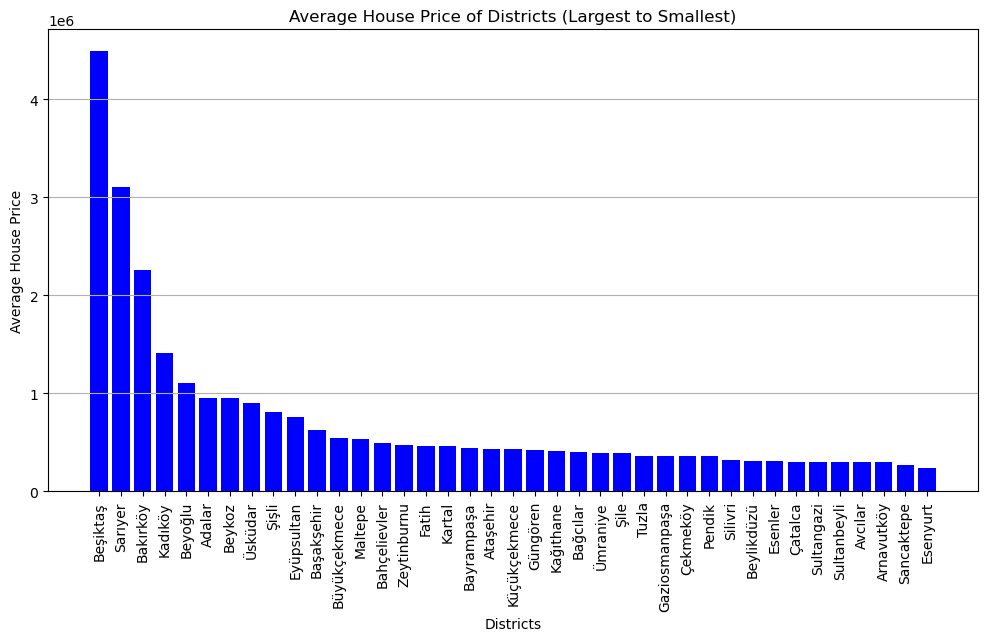

In [17]:


# Sort the DataFrame by 'Price' in descending order
sorted_prices = district_dataframe.sort_values(by='Price', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))    # Set a figure size 
plt.bar(sorted_prices['District'], sorted_prices['Price'], color='blue')  # 'District' is on the x axis and 'Price' is on the y axis 
plt.xlabel('Districts')  # X axis label
plt.ylabel('Average House Price')  # Y axis label
plt.title('Average House Price of Districts (Largest to Smallest)')  # Title of the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines along the y-axis

# Show the plot
plt.show()


18.	In this question you will predict the price of a house and add a new column which has the price predictions. How to predict the price of a house? Well, a very easy way of doing this is to find the average of n nearest neighbors (i.e., houses). For this question, let’s pick 3 neighbors. How to find whether two houses are close to each other or not? You have the coordinates! 

In [25]:
# Iterate the rows with the specified columns
for index, house in df[['Coord1', 'Coord2', 'Order', 'Price']].iterrows():
    
    # Get the coordinates of the current house
    house_xaxis, house_yaxis = house['Coord1'], house['Coord2']
    
    
    # Calculate euclidean distances
    df['EuclideanDistance'] = ((df['Coord1'] - house_xaxis)**2 + (df['Coord2'] - house_yaxis)**2)**0.5
    # Select the three closest neighbors (excluding the current house)
    neighbors = df[df['Order'] != house['Order']].nsmallest(3, 'EuclideanDistance')
    # Calculate the average price of 3 closest neighbors
    avg_price = neighbors['Price'].mean()
    # Adding a new column which includes the predictions
    df.loc[index, 'Price_Prediction'] = avg_price

# Drop the 'EuclideanDistance' column
df.drop('EuclideanDistance', axis=1, inplace=True) 

In [26]:

df[['Price_Prediction', 'Price']]

,Price_Prediction,Price
0,2.166667e+05,45000.0
1,3.450000e+05,48000.0
2,3.666667e+05,50000.0
3,1.733333e+05,59999.0
4,6.150000e+05,60000.0
...,...,...
7013,1.400000e+07,19950000.0
7014,3.800000e+06,21000000.0
7015,2.133333e+06,23500000.0
7016,1.108333e+07,27000000.0
